<a href="https://colab.research.google.com/github/kouasifreshnesrameauxzouzou/CAPSTONEPROJET/blob/main/ANALYSE_DE_RISQUE_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import autoviz
import seaborn as sns

In [2]:
cred=pd.read_csv('/content/drive/MyDrive/loan.csv')

<ipython-input-2-8cc7d3ef23ac>:1: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  cred=pd.read_csv('/content/drive/MyDrive/loan.csv')


In [3]:
cred.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
colonnes_a_supprimer = [
    "desc", "url", "mths_since_last_delinq", "mths_since_last_record",
    "next_pymnt_d", "mths_since_last_major_derog", "annual_inc_joint", "dti_joint",
    "verification_status_joint", "open_acc_6m", "open_il_6m", "open_il_12m",
    "open_il_24m", "mths_since_rcnt_il", "total_bal_il", "il_util", "open_rv_12m",
    "open_rv_24m", "max_bal_bc", "all_util", "total_rev_hi_lim", "inq_fi",
    "total_cu_tl", "inq_last_12m"
]
df = cred.drop(columns=colonnes_a_supprimer)


In [5]:
data=df.dropna()
data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal
42535,10149342,12000897,27050.0,27050.0,27050.0,36 months,10.99,885.46,B,B2,...,0.0,Jan-2016,885.46,Dec-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,114834.0
42536,10159584,12011200,9750.0,9750.0,9750.0,36 months,13.98,333.14,C,C1,...,0.0,Jan-2016,333.14,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,14123.0
42537,10159498,1319523,12000.0,12000.0,12000.0,36 months,6.62,368.45,A,A2,...,0.0,Jan-2016,368.45,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,267646.0


In [6]:
mode_date = data['last_pymnt_d'].mode()[0]
df['last_pymnt_d'].fillna(mode_date, inplace=True)

In [7]:
data['annual_inc'].fillna(data['annual_inc'].median(), inplace=True)
data['delinq_2yrs'].fillna(data['delinq_2yrs'].median(), inplace=True)
data['emp_title'].fillna('Inconnu', inplace=True)
data['emp_length'].fillna('Non spécifié', inplace=True)
data['title'].fillna('Inconnu', inplace=True)
data['pymnt_plan'].fillna(df['pymnt_plan'].mode()[0], inplace=True)
data['application_type'].fillna(data['application_type'].mode()[0], inplace=True)
data['tot_coll_amt'].fillna(0, inplace=True)
data['tot_cur_bal'].fillna(0, inplace=True)


<ipython-input-7-3f39e16f8c8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['annual_inc'].fillna(data['annual_inc'].median(), inplace=True)
<ipython-input-7-3f39e16f8c8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['delinq_2yrs'].fillna(data['delinq_2yrs'].median(), inplace=True)
<ipython-input-7-3f39e16f8c8c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['emp_title'].fillna('Inconnu', inplace=True)
<ipython-

## Visualisation des indicateurs clés

<ipython-input-8-b468324c6cff>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['issue_year'] = pd.to_datetime(data['issue_d']).dt.year
<ipython-input-8-b468324c6cff>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'] = data['issue_year'] - data['earliest_cr_line'].str[-4:].astype(int)


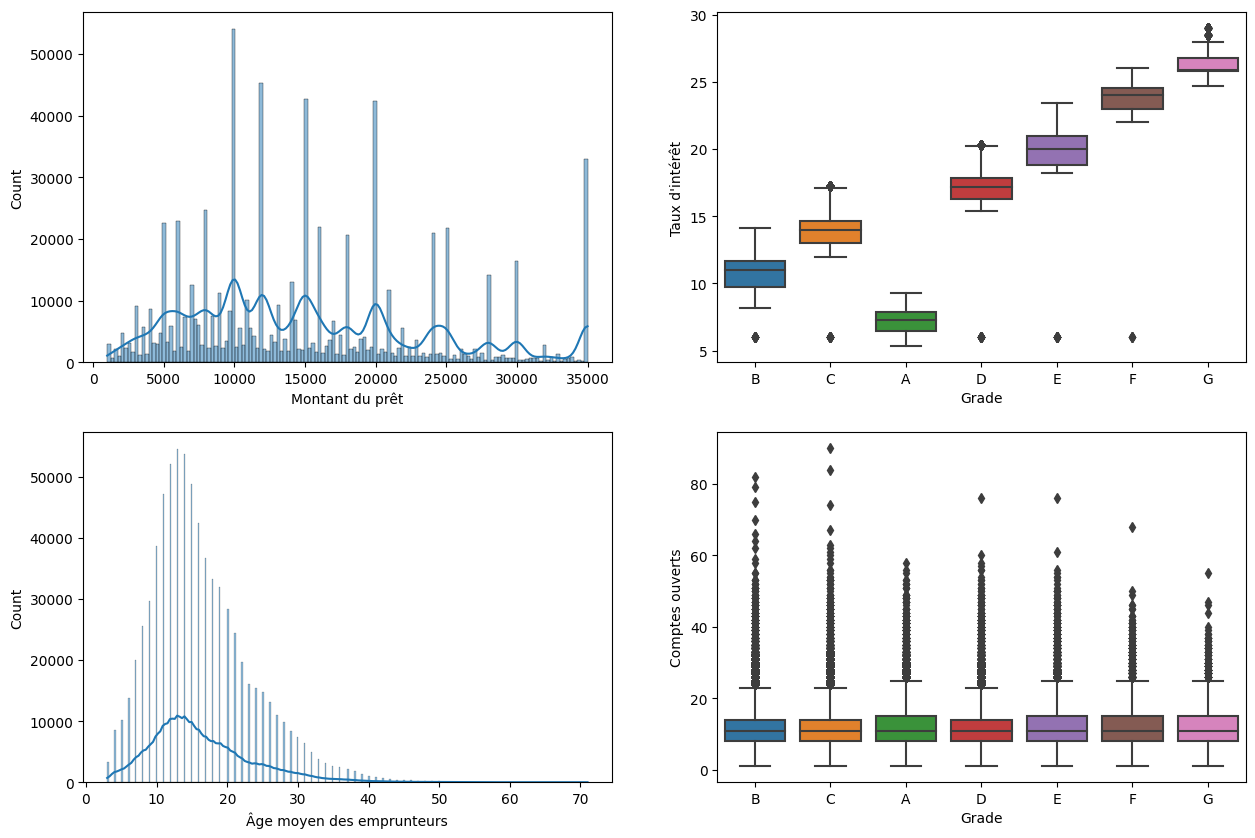

In [8]:
plt.figure(figsize=(15, 10))
plt.subplot(221)
sns.histplot(data=data, x='loan_amnt', kde=True)
plt.xlabel('Montant du prêt')
plt.subplot(222)
sns.boxplot(data=data, x='grade', y='int_rate')
plt.xlabel('Grade')
plt.ylabel('Taux d\'intérêt')
plt.subplot(223)
data['issue_year'] = pd.to_datetime(data['issue_d']).dt.year
data['age'] = data['issue_year'] - data['earliest_cr_line'].str[-4:].astype(int)
sns.histplot(data=data, x='age', kde=True)
plt.xlabel('Âge moyen des emprunteurs')
plt.subplot(224)
sns.boxplot(data=data, x='grade', y='open_acc')
plt.xlabel('Grade')
plt.ylabel('Comptes ouverts')
plt.show()

In [9]:
def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(6 * figscale, 6 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()
chart = heatmap(data, *['verification_status', 'pymnt_plan'], **{})
chart

In [12]:
def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()
chart = heatmap(data, *['home_ownership', 'verification_status'], **{})
chart

In [13]:
def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(data, *['term', 'grade'], **{})
chart

In [14]:

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(data, *['home_ownership'], **{})
chart

In [15]:
def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()
chart = categorical_histogram(data, *['term'], **{})
chart

In [16]:
def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()
chart = heatmap(data, *['home_ownership', 'verification_status'], **{})
chart

In [17]:
def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (8 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(data, *['id', 'verification_status'], **{'inner': 'box'})
chart

In [18]:
# Créez un nouveau DataFrame avec les colonnes 'loan_amnt' et 'funded_amnt_inv'
df_loan_vs_funded = data[['loan_amnt', 'funded_amnt_inv']]

# Calculez l'écart entre 'loan_amnt' et 'funded_amnt_inv'
df_loan_vs_funded['ecart'] = df_loan_vs_funded['loan_amnt'] - df_loan_vs_funded['funded_amnt_inv']

df_loan_vs_funded



<ipython-input-18-ac0c5d698e1c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan_vs_funded['ecart'] = df_loan_vs_funded['loan_amnt'] - df_loan_vs_funded['funded_amnt_inv']


,loan_amnt,funded_amnt_inv,ecart
42535,27050.0,27050.0,0.0
42536,9750.0,9750.0,0.0
42537,12000.0,12000.0,0.0
42538,12000.0,12000.0,0.0
42539,15000.0,15000.0,0.0
...,...,...,...
887374,10000.0,10000.0,0.0
887375,24000.0,24000.0,0.0
887376,13000.0,13000.0,0.0
887377,12000.0,12000.0,0.0


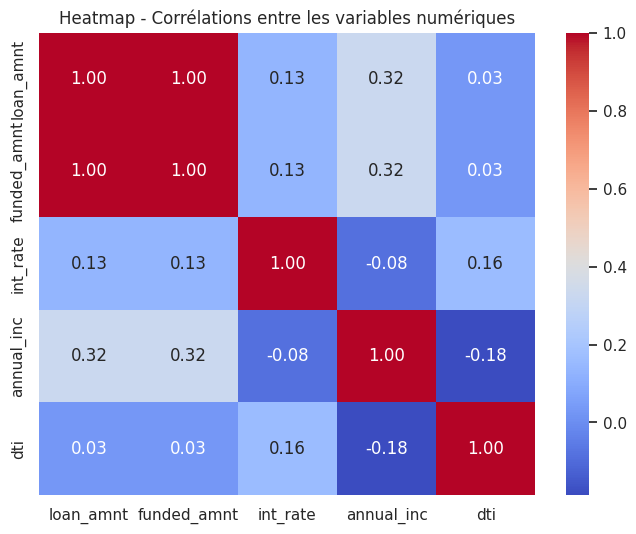

In [19]:

# Sélectionner des colonnes numériques pour le heatmap
numeric_columns = ['loan_amnt', 'funded_amnt', 'int_rate', 'annual_inc', 'dti']

# Créer un heatmap des corrélations entre ces colonnes
correlation_matrix = data[numeric_columns].corr()
sns.set_theme(style="white")
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap - Corrélations entre les variables numériques')
plt.show()


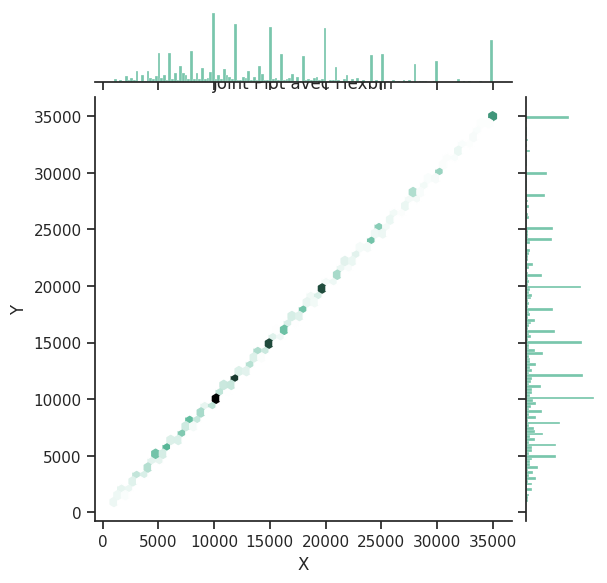

In [20]:
rs = np.random.RandomState(11)
x = data['loan_amnt']
y = data['funded_amnt_inv']
sns.set_theme(style="ticks")
sns.jointplot(x=x, y=y, kind="hex", color="#4CB391")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Joint Plot avec Hexbin')
plt.show()

In [21]:

solvency_rates = data.groupby('sub_grade')['loan_status'].value_counts(normalize=True).unstack().fillna(0)
solvency_rates['solvency_rate'] = solvency_rates['Fully Paid'] * 100
default_probabilities = data.groupby('grade')['loan_status'].value_counts(normalize=True).unstack().fillna(0)
default_probabilities['default_probability'] = default_probabilities['Charged Off'] * 100
print("Taux de solvabilité par sous-grade :")
print(solvency_rates[['solvency_rate']])
print("\nProbabilité par grade :")
print(default_probabilities[['default_probability']])


Taux de solvabilité par sous-grade :
loan_status  solvency_rate
sub_grade                 
A1               18.011671
A2               18.016942
A3               20.349478
A4               20.319942
A5               18.288319
B1               20.090827
B2               22.876920
B3               22.629005
B4               22.205499
B5               20.184482
C1               19.803800
C2               19.194547
C3               18.297118
C4               17.641999
C5               19.135426
D1               18.885616
D2               19.653913
D3               19.537149
D4               18.390175
D5               17.828904
E1               15.785108
E2               16.015253
E3               16.029593
E4               16.780788
E5               16.744414
F1               18.519731
F2               18.573944
F3               19.440042
F4               19.062392
F5               19.573115
G1               19.106218
G2               19.290657
G3               18.500605
G4               2

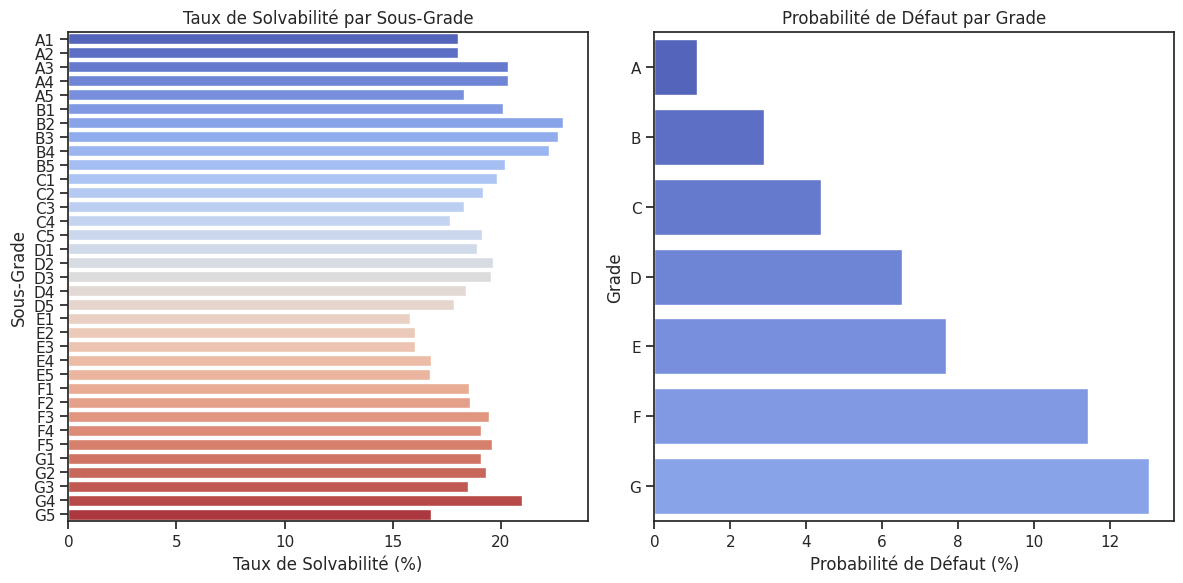

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Données de taux de solvabilité par sous-grade
solvency_rates_data = {
    'sub_grade': ['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
    'solvency_rate': [18.01, 18.02, 20.34, 20.32, 18.29, 20.09, 22.88, 22.63, 22.21, 20.18, 19.80, 19.19, 18.29, 17.64, 19.14, 18.88, 19.65, 19.53, 18.39, 17.82, 15.78, 16.01, 16.02, 16.78, 16.74, 18.51, 18.57, 19.44, 19.06, 19.57, 19.10, 19.29, 18.50, 20.96, 16.77]
}

# Créez un DataFrame à partir des données de taux de solvabilité
solvency_df = pd.DataFrame(solvency_rates_data)

# Données de probabilité de défaut par grade
default_probabilities_data = {
    'grade': ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
    'default_probability': [1.12, 2.88, 4.39, 6.53, 7.69, 11.42, 13.04]
}

# Créez un DataFrame à partir des données de probabilité de défaut
default_df = pd.DataFrame(default_probabilities_data)

# Créez une liste de couleurs allant du vert au rouge
colors = sns.color_palette("coolwarm", len(solvency_df))

# Créez un sous-traceur pour le taux de solvabilité
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=solvency_df, x='solvency_rate', y='sub_grade', palette=colors)
plt.xlabel('Taux de Solvabilité (%)')
plt.ylabel('Sous-Grade')
plt.title('Taux de Solvabilité par Sous-Grade')

# Créez un sous-traceur pour la probabilité de défaut
plt.subplot(1, 2, 2)
sns.barplot(data=default_df, x='default_probability', y='grade', palette=colors)
plt.xlabel('Probabilité de Défaut (%)')
plt.ylabel('Grade')
plt.title('Probabilité de Défaut par Grade')

# Ajustez l'espace entre les sous-traceurs
plt.tight_layout()

# Affichez le graphique
plt.show()



In [23]:
def default_probability(sub_grade):
    sub_grade_data = data[data['sub_grade'] == sub_grade]
    default_count = len(sub_grade_data[sub_grade_data['loan_status'] == 'Charged Off'])
    total_loans = len(sub_grade_data)
    return (default_count / total_loans) * 100
sub_grade_probabilities = pd.DataFrame(data['sub_grade'].unique(), columns=['sub_grade'])
sub_grade_probabilities['default_probability'] = sub_grade_probabilities['sub_grade'].apply(default_probability)
sub_grade_probabilities = sub_grade_probabilities.sort_values(by='default_probability', ascending=False)
print(sub_grade_probabilities)

   sub_grade  default_probability
31        G5            14.988814
30        F5            14.850136
27        G1            13.989637
26        G3            13.422007
29        F4            13.098931
33        F3            12.810354
34        G2            12.197232
28        F2            10.497359
32        G4             9.807692
23        E5             9.342008
25        F1             9.218929
12        E4             8.464821
22        E3             7.842170
18        E2             7.578646
14        D4             7.218189
10        D5             6.989897
17        D3             6.496001
21        D2             6.473250
15        E1             6.348497
24        D1             5.869682
7         C5             5.506877
16        C4             4.647648
11        C3             4.514047
13        C2             3.926361
1         C1             3.625050
6         B4             3.338774
3         B5             3.290090
5         B3             3.064814
0         B2  

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 752938 entries, 42535 to 887378
Data columns (total 52 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          752938 non-null  int64  
 1   member_id                   752938 non-null  int64  
 2   loan_amnt                   752938 non-null  float64
 3   funded_amnt                 752938 non-null  float64
 4   funded_amnt_inv             752938 non-null  float64
 5   term                        752938 non-null  object 
 6   int_rate                    752938 non-null  float64
 7   installment                 752938 non-null  float64
 8   grade                       752938 non-null  object 
 9   sub_grade                   752938 non-null  object 
 10  emp_title                   752938 non-null  object 
 11  emp_length                  752938 non-null  object 
 12  home_ownership              752938 non-null  object 
 13  annual_inc

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [26]:

# Extraction des fonctionnalités et des étiquettes
X = data.drop('sub_grade',axis=1)
y = data['sub_grade']



In [ ]:

# Encodage one-hot des variables catégorielles
categorical_cols = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


In [ ]:

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Entraînement du modèle de régression logistique
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Évaluation du modèle
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))